## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

The AI tool is developed for the purpose of classifying waste. The tool is capable of correctly classifying 6 different types of waste such as cardboard, plastic, paper, metal, glass and vegetation. The model has high performance when it comes to classifying waste. It can correctly identify a type of waste correctly 80% of the time. Further, when it classifies a waste time it is accurate 80% of the time. The model is best when it is classifying vegetation where it will classify vegetation correctly 100% of the time and will only have 4% other types classified as the vegetation class. However,the model is weak when classifying plastic and is accurate only 67% of the time and may classify other types as plastic 36% of the time. It is recommended to retrain the model with better images for plastics to overcome this issue. It is also recommended to implement this solution with human oversight to oversee the classification of plastics.

In [ ]:
#Setting left alignment
%%html
<style>table {float:left}</style>
<style>img {float:left}</style>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading libraries
from google.colab import drive
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#Defining a function to plot images
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
#defining a function to plot history
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

In [ ]:
# to show the folders under the dataset
!ls '/content/drive/MyDrive/Part2_WasteImages'

Cardboard  Glass  Metal  Paper	Plastic  Vegetation


In [ ]:
# Set the paths to the folders containing the image files
cardboard_path = '/content/drive/MyDrive/Part2_WasteImages/Cardboard'
glass_path = '/content/drive/MyDrive/Part2_WasteImages/Glass'
metal_path = '/content/drive/MyDrive/Part2_WasteImages/Metal'
paper_path = '/content/drive/MyDrive/Part2_WasteImages/Paper'
plastic_path = '/content/drive/MyDrive/Part2_WasteImages/Plastic'
vegetation_path = '/content/drive/MyDrive/Part2_WasteImages/Vegetation'

# get a list of all files in the folder
cardboard_file_list = os.listdir(cardboard_path)
glass_file_list = os.listdir(glass_path)
metal_file_list = os.listdir(metal_path)
paper_file_list = os.listdir(paper_path)
plastic_file_list = os.listdir(plastic_path)
vegetation_file_list = os.listdir(vegetation_path)

# print the total number of files
print(f'Total number of files under cardboard folder are: {len(cardboard_file_list)}')
print(f'Total number of files under glass folder are: {len(glass_file_list)}')
print(f'Total number of files under metal folder are: {len(metal_file_list)}')
print(f'Total number of files under paper folder are: {len(paper_file_list)}')
print(f'Total number of files under plastic folder are: {len(plastic_file_list)}')
print(f'Total number of files under vegetation folder are: {len(vegetation_file_list)}')

Total number of files under cardboard folder are: 461
Total number of files under glass folder are: 420
Total number of files under metal folder are: 547
Total number of files under paper folder are: 500
Total number of files under plastic folder are: 500
Total number of files under vegetation folder are: 436


<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

The data for the waste classification model consists images of the 6 classes, specifially cardboard, glass, metal, paper, plastic and vegetation. The data was stored in a google drive due to the large size and convinience.

Once the data has been loaded to the python file, the jpg and jpeg images have been resized to 50 by 50 and processed to 3 channels to accomodate the red, green and blue color shades.

once the data has been standardised as mentioned above, the data is classified into 6 class labels a list of tuples containing the class name and the images. Then the data is shuffled and split into training and testing sets.

In [ ]:
# Create a list to store the image data and labels
data = []

# Iterate through the files in the cardboard folder
for file in os.listdir(cardboard_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(cardboard_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Cardboard'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the glass folder
for file in os.listdir(glass_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(glass_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Glass'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the metal folder
for file in os.listdir(metal_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(metal_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Metal'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the paper folder
for file in os.listdir(paper_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(paper_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    label = 'Paper'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the plastic folder
for file in os.listdir(plastic_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(plastic_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Plastic'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the vegetation folder
for file in os.listdir(vegetation_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(vegetation_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Vegetation'
    # Add the image data and label to the data list
    data.append((img, label))


In [ ]:
# Data parameters
img_rows, img_cols = 50, 50
channels = 3

num_classes = 6

In [ ]:
# Shuffle the data and split into train/test sets
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.8)], data[int(len(data) * 0.8):]

In [ ]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
#Normalize input data
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

# print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (2291, 50, 50, 3)
Testing matrix shape (573, 50, 50, 3)


In [ ]:
print('The original format of class of the first element in the training dataset is: ',Y_train[0], '\n')

# Create a NumPy array with category strings
categories = np.array(['Cardboard', 'Glass','Metal','Paper','Plastic','Vegetation'])

# Create a mapping from category strings to integers
category_map = {'Cardboard':0, 'Glass':1,'Metal':2,'Paper':3,'Plastic':4,'Vegetation':5 }

# Encode the categories
Y_train = np.array([category_map[category] for category in Y_train])
Y_test = np.array([category_map[category] for category in Y_test])

print('The unique integer mapping encoding format of the calss of the first element in the training dataset is: ',Y_train[0])

The original format of class of the first element in the training dataset is:  Metal 

The unique integer mapping encoding format of the calss of the first element in the training dataset is:  2


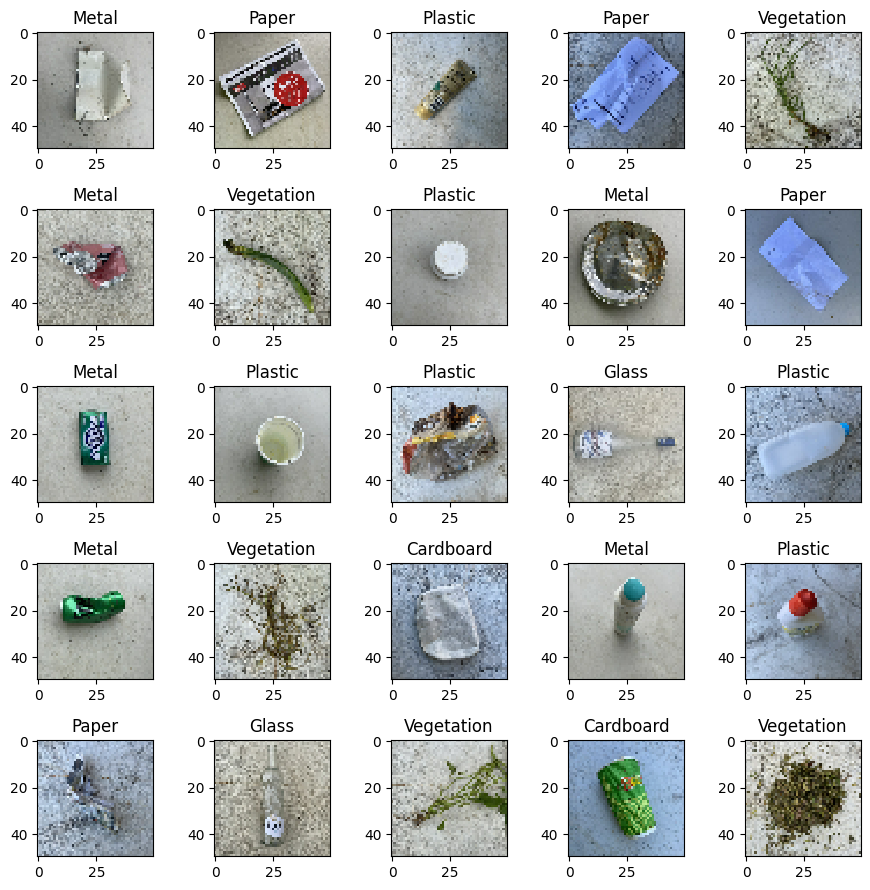

In [ ]:
# change the default figure size for all plots created in the program
plt.rcParams['figure.figsize'] = (9,9)

labels =  ['Cardboard','Glass','Metal','Paper','Plastic','Vegetation']

for i in range(25):
    # plt.subplot() function takes three integer arguments: the number of rows, the number of columns, and the index of the subplot.
    plt.subplot(5,5,i+1)
    # plt.imshow() function displays the image at index i in the X_train array as a grayscale image, with no interpolation applied.
    plt.imshow(X_train[i], interpolation='none')
    plt.title("{}".format(labels[int(Y_train[i])]))

plt.tight_layout()

<a id = "cell_model"></a>
## 3. Predictive Modeling



Among different model architectures and parameter settings, the best performing model is model 3 with optimizer set as Adam and learning rate at 0.0007.

The model has 3 convolutional layers. The first two convolutional layers have 64 kernals each with 3 by 3 size. The size 3,3 in models tend to increase performance based on past experiments.

Further Both convolutional layers also have the pooling layer with pooling size set at 2,2. The drop out rate in this model is set at 0.2 to improve the models generalisation ability. the activation type of the best performing model is relu.

The model has two dense layers,. The first dense layer has 125 nodes with a 0.2 drop off to preventy over fitting. The second dense layer has 100 nodes and drop out is set to 0.5 as models with more nodes tend to over fit in past experiments.

The output layer size is set to match the number of classes and is set to softmax to accomodate classification.

This model achieves the best results when run with optimizer set to adam and learning rate set to 0.0007 and batch size is set to 128 with 100 epochs. The training will stop at 91 epochs due to early stopping by monitoring accuracy improvements.

The model has high training and testing accuracy rates at 96% and 80% respectivly. The reason that testing accuracy is lower than training accuracy is due to overfitting tendancies. However, this model's performance has been improved with adjusting drop out rates and nodes.





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.layers import LeakyReLU

Creating different models

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=num_classes)
Y_test = to_categorical(Y_test, num_classes=num_classes)

In [ ]:
#Best model
def model_3():
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Second Convolutional Layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.20))

    # Third Convolutional Layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.20))

    # Flattening the layers
    model.add(Flatten())

    # Fully Connected Layer (Dense Layer)
    model.add(Dense(125, activation='relu'))
    model.add(Dropout(0.2))

    # Second Fully Connected Layer (Dense Layer)
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Print model summary
    model.summary()

    return model

In [ ]:
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

In [ ]:
model = model_3()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 9, 9, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 125)                 │          64,125 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 100)                 │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,515 (525.45 KB)

 Trainable params: 134,515 (525.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=categorical_crossentropy, optimizer = Adam(learning_rate=0.0007, beta_1=0.9, beta_2=0.999, epsilon=1e-07),metrics=['accuracy'])

#Other Optimizers that can be used instead of RMSprop
#Adadelta(lr=0.001, rho=0.95, epsilon=1e-07)
#Adadelta(lr=0.05, rho=0.99, epsilon=1e-07)
#Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#optimizer=RMSprop(learning_rate=0.001,weight_decay=1e-6)
#optimizer=Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07),metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
      batch_size=128,
      epochs=100,
      verbose=2,
      validation_data=(X_test, Y_test),
      validation_split=0.2,
      callbacks=keras_callbacks)

Epoch 1/100
18/18 - 10s - 569ms/step - accuracy: 0.1851 - loss: 1.7945 - val_accuracy: 0.2129 - val_loss: 1.7824
Epoch 2/100
18/18 - 3s - 192ms/step - accuracy: 0.2012 - loss: 1.7742 - val_accuracy: 0.2827 - val_loss: 1.7498
Epoch 3/100
18/18 - 0s - 15ms/step - accuracy: 0.2746 - loss: 1.7028 - val_accuracy: 0.3176 - val_loss: 1.6480
Epoch 4/100
18/18 - 0s - 18ms/step - accuracy: 0.3064 - loss: 1.6648 - val_accuracy: 0.3874 - val_loss: 1.6441
Epoch 5/100
18/18 - 0s - 15ms/step - accuracy: 0.3579 - loss: 1.6012 - val_accuracy: 0.4293 - val_loss: 1.4862
Epoch 6/100
18/18 - 0s - 17ms/step - accuracy: 0.4090 - loss: 1.4883 - val_accuracy: 0.4991 - val_loss: 1.4193
Epoch 7/100
18/18 - 0s - 16ms/step - accuracy: 0.4714 - loss: 1.4018 - val_accuracy: 0.5148 - val_loss: 1.3302
Epoch 8/100
18/18 - 0s - 19ms/step - accuracy: 0.4801 - loss: 1.3884 - val_accuracy: 0.5724 - val_loss: 1.2179
Epoch 9/100
18/18 - 1s - 34ms/step - accuracy: 0.4976 - loss: 1.3185 - val_accuracy: 0.5585 - val_loss: 1.197

In [ ]:
# Evaluate on training data
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.1169
Train accuracy: 0.9699 

Test loss: 0.6076
Test accuracy: 0.8028


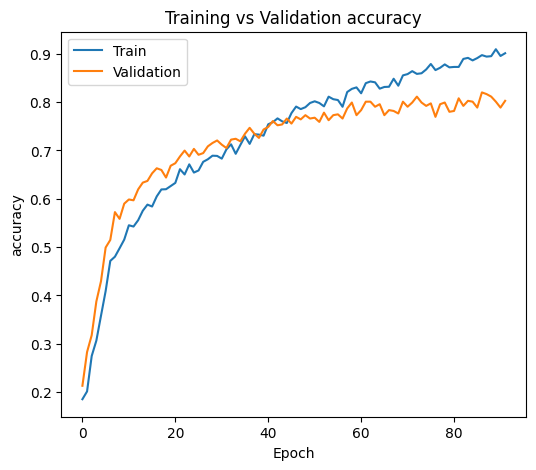

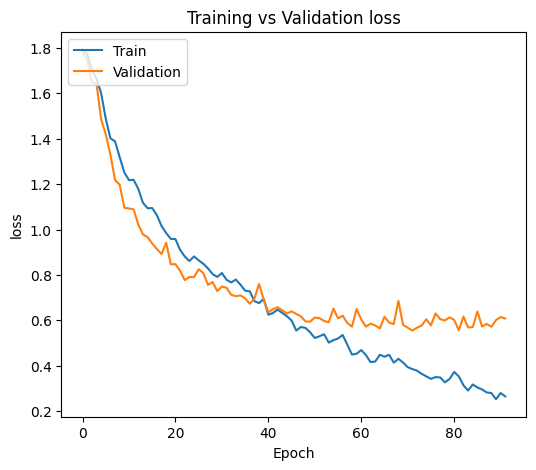

In [ ]:
plot_hist(pd.DataFrame(hist.history))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(Y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= labels)

# Print the report
print("The result of the classification report is: \n ",report)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
The result of Kappa is : 0.763
The result of the classification report is: 
                precision    recall  f1-score   support

   Cardboard       0.80      0.78      0.79       101
       Glass       0.88      0.83      0.86        82
       Metal       0.74      0.82      0.78       114
       Paper       0.80      0.76      0.78        98
     Plastic       0.67      0.64      0.66        92
  Vegetation       0.96      1.00      0.98        86

    accuracy                           0.80       573
   macro avg       0.81      0.81      0.81       573
weighted avg       0.80      0.80      0.80       573



In [ ]:
y_pred

array([[4.57738154e-03, 3.25899478e-03, 8.53319049e-01, 4.54402203e-03,
        1.34244904e-01, 5.56582163e-05],
       [8.16188604e-02, 3.23631525e-06, 7.71224916e-01, 1.44019589e-01,
        3.12901358e-03, 4.39740688e-06],
       [8.70743021e-02, 3.35819386e-02, 1.22638904e-01, 2.61799216e-01,
        4.61510658e-01, 3.33948731e-02],
       ...,
       [1.34860065e-05, 1.13204944e-04, 8.37351254e-05, 6.19070270e-05,
        1.81814030e-04, 9.99545872e-01],
       [9.53309298e-01, 1.85823883e-04, 4.22462181e-04, 4.46122400e-02,
        1.46809034e-03, 2.17139086e-06],
       [1.68135994e-05, 9.99824405e-01, 1.36409508e-04, 9.79782044e-07,
        1.56638089e-05, 5.85452290e-06]], dtype=float32)

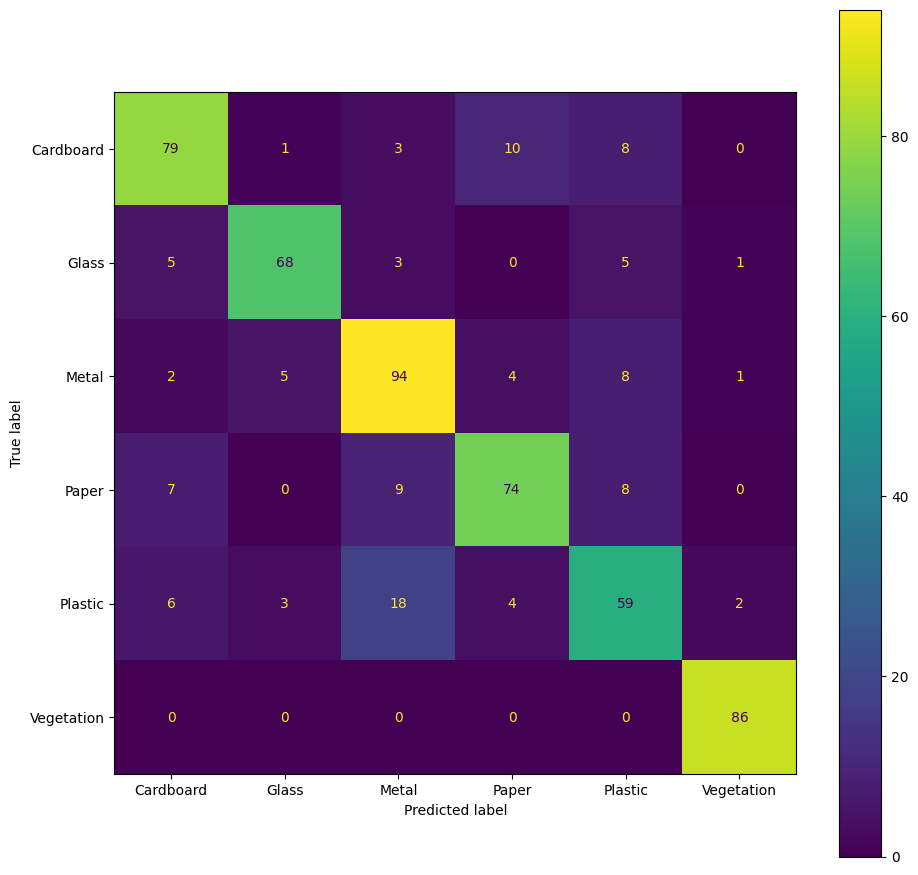

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


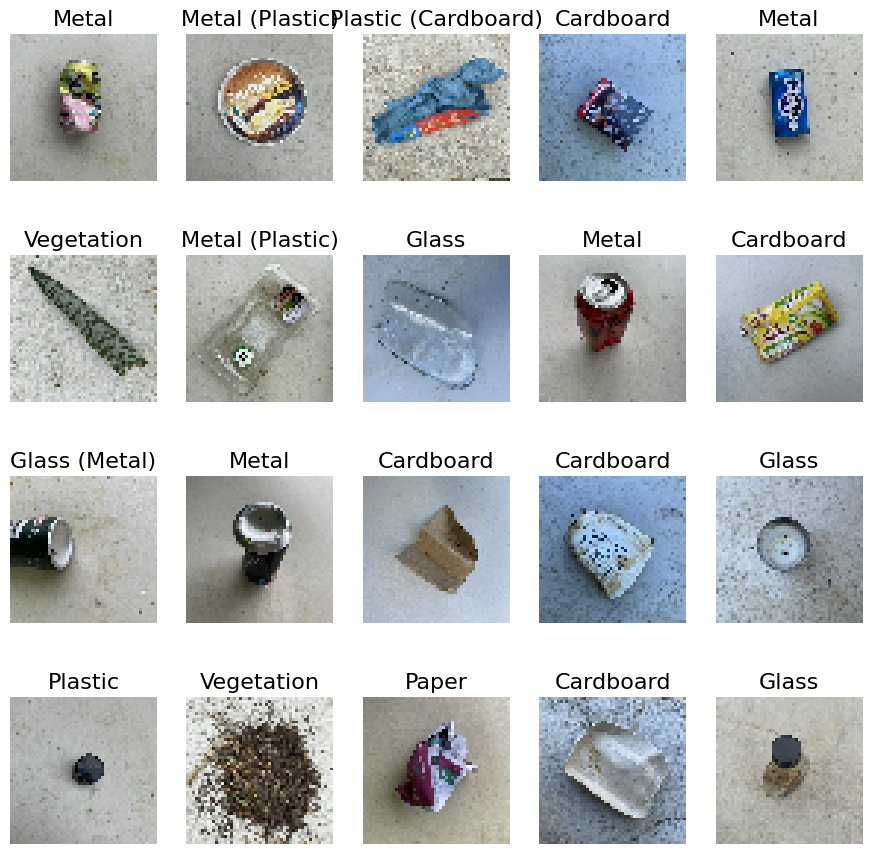

In [ ]:
from re import X
img_range = range(20)
imgs = X_test[img_range]
true_labels = [labels[np.argmax(x)] for x in Y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [labels[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(11,11), titles=titles)

<a id = "cell_report"></a>
## 4. Experiments Report

**Model performance**

The model has high accuracy rate for the testing phase at 0.8,meaning that 80% of the models predictions are correct overall (both tp and tn).

Further, the model also has high kappa value at 0.76. Furthermore, the model's precision is also at 80% which indicates its good at correctly identifying positive classes.

The recall value for the model is high at 79% which also indicates that the model is good at identifiying the true positives with low number of false negatives.

**Model performance classes**

Best performing classes,

Vegetation is the best performing class with precision 0.96 recall 100 indicating that all vegetation has been identified correctly and only 4% predicted are vegetation are false positives.
The model's second best classification is for glass. 88% of the glass is correctly predicted and only 17% are false positives for glass.

The model has similar performance for cardboard and paper.
Cardboard can be correctly classified 80% of the time and 78% of the classifications of cardboard are actually cardboard. For paper, the model will correctly classify paper 80% of the time and 78% of paper classifications will actually be paper.

However, the model is not performing well on metal and plastic. the model will correctly classify metal as metal 74% of the time which is lower than the other 4 classes. But out of the total metal classifications 82% will actually be metal which is on par with the other classes.

The model is worst performing on plastic. The model will only correctly classify plastic 67% of the time. The plastic the model has classified will only have plastic in it 64% of the time.

Further, when it comes to incorrect classifications of other classes, plastic is sorted into other classes.

**Model comparission**

A total of of 5 different model architectures were created and tested. Based on intial performances, it was identified that models with more convolutional layers would perform better. However, when addidnt more and more dense layers, the models tend to overfit (based on high training accuracy and low testing accuracy). For example Model 3 is performing better than model than model 4 due to its less complexity however, it is more complex than models 1 and 2.

The increased performance has gained through increasing the convolution layer number to 3. Further, models with 3,3 kernal size is perfoming better than 5,5 or 7,7.

When selecting the optimizer the adam optimiser has the highest performance. The lowest performance has been with Adelta optimizer.

Adam optimizer is performing best at a learning rate of 0.0001 to increase precise convergence and also to avoid missing the optimal point in the loss function.

**Further imporvements**

The model is performing well on most classes. The low performance when it comes to plastic can also be due to the images in the dataset. The image quality can also impact the model' performance. Further, the model can be confusing these images due to the background of the image. For instance, some of the plstic images are mostlt blending into the background the bottles or items have been photographed when the item is standing up.

Further improvements can be made to the model by re training with better quality images. If not, the model can be used only for classifying the other 5 classes not the cardboard. The business will have to implement manual procudures when classifying the plastic or have greater human over sight.


In [ ]:
models_2_path = '/content/part 2 models.xlsx'

# Read the Excel
performance_models = pd.read_excel(models_2_path)

# Display the contents of the Excel file
performance_models

,Model,Architecture,Kappa,Testing Accuracy,Precision,Recall,Training accuracy
0,Model 1,"CNN with , kernal 32 of size 5",0.587,0.66,0.67,66.00,98.000
1,Model 1,"CNN with , 32 kernals size 3",0.622,0.69,69.00,69.00,0.960
2,Model 2,First convolutional layer with 32 kernals siz...,0.716,0.76,0.78,0.77,0.990
3,Model 3 Optimiser = RMS Prop with learning rat...,First convolutional layer with 64 kernals siz...,0.680,0.74,0.80,0.79,0.930
4,Model 3 (Optimiser = RMS Prop with learning ra...,First convolutional layer with 64 kernals siz...,0.719,0.77,0.77,0.77,0.950
5,Model 3 (Optimiser = Adam learning rate 0.0001,First convolutional layer with 64 kernals siz...,0.740,0.78,0.79,0.79,0.970
6,Best Model Model 3 (Optimiser = Adam learning ...,First convolutional layer with 64 kernals siz...,0.763,0.80,0.80,0.79,0.960
7,Model 4,First convolutional layer with 32 kernals siz...,0.678,0.73,0.74,0.74,0.730
8,Model 4 Optimiser Adelta,First convolutional layer with 32 kernals siz...,0.028,0.19,0.27,0.19,0.203
